#### A prefix sum is a great tool whenever a problem involves sums of a subarray.
Prefix sum is a technique that can be used on arrays (of numbers). The idea is to create an array prefix where prefix[i] is the sum of all elements up to the index i (inclusive). For example, given nums = [5, 2, 1, 6, 3, 8], we would have prefix = [5, 7, 8, 14, 17, 25].

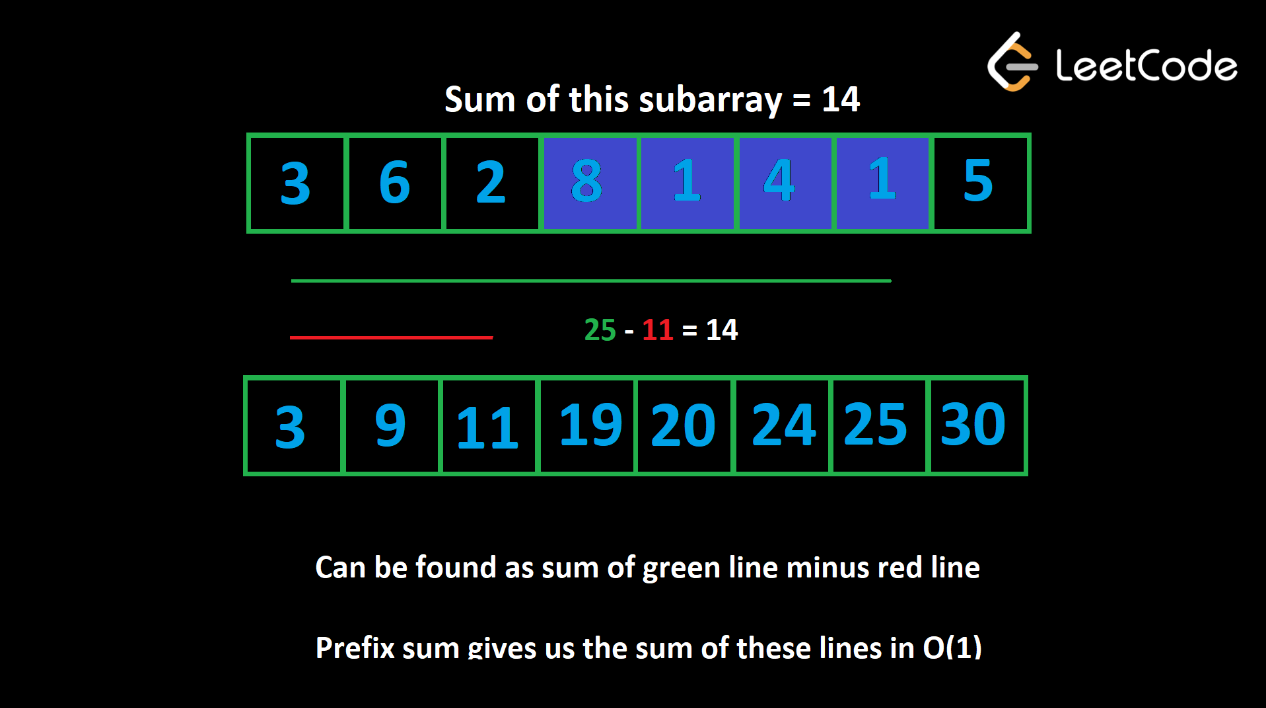

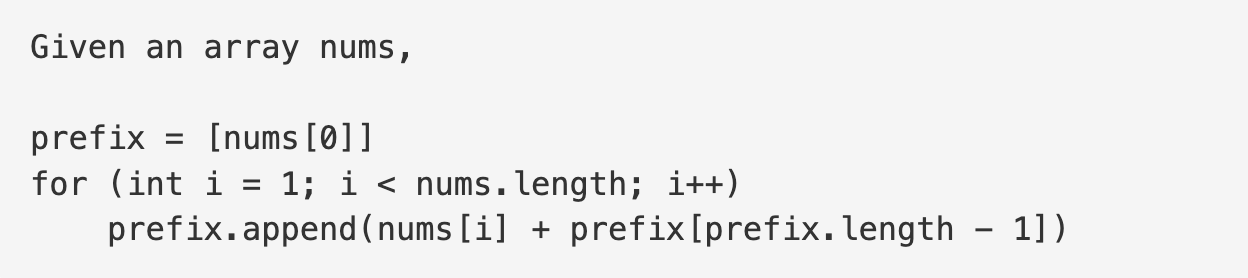

#### Example 1: Given an integer array nums, an array queries where queries[i] = [x, y] and an integer limit, return a boolean array that represents the answer to each query. A query is true if the sum of the subarray from x to y is less than limit, or false otherwise.

For example, given nums = [1, 6, 3, 2, 7, 2], queries = [[0, 3], [2, 5], [2, 4]], and limit = 13, the answer is [true, false, true]. For each query, the subarray sums are [12, 14, 12].

In [22]:
class Solution:
    def queryPrefixSum(self, nums, queries, limit):
        prefix = [nums[0]]
        for i in range(1, len(nums)):
            prefix.append(nums[i] + prefix[-1])

        ans = []
        for x, y in queries:
            curr = prefix[y] - prefix[x - 1]
            ans.append(curr < limit)

        return ans

In [7]:
sol = Solution()
result = sol.queryPrefixSum([1, 6, 3, 2, 7, 2], [[0, 3], [2, 5], [2, 4]], 13)
print(result)

[True, False, True]


#### Example 2: Number of Ways to Split Array. Given an integer array nums, find the number of ways to split the array into two parts so that the first section has a sum greater than or equal to the sum of the second section. The second section should have at least one number.

In [23]:
class Solution:
    def splitArray(self, nums):
        prefix = [nums[0]]
        for i in range(1, len(nums)):
            prefix.append(nums[i] + prefix[-1])

        ans = 0
        # minus one since we can not split over the last element
        for i in range(len(nums) - 1):
            left_section = prefix[i]
            right_section = prefix[-1] - prefix[i]
            if left_section > right_section:
                ans +=1
        return ans        

In [13]:
sol = Solution()
result = sol.splitArray([10, 4, -8, 7])
print(result)

2


####  Running Sum of 1d Array: Given an array nums. We define a running sum of an array as runningSum[i] = sum(nums[0]…nums[i]).

Return the running sum of nums.

In [20]:
class Solution:
    def runningSum(self, nums):
        prefix = [nums[0]]
        #starting from index 1 since the index 0 is already included
        for i in range(1, len(nums)):
            prefix.append(nums[i] + prefix[-1])
        
        return prefix

In [21]:
sol = Solution()
result = sol.runningSum([3,1,2,10,1])
print(result)

[3, 4, 6, 16, 17]


#### Minimum Value to Get Positive Step by Step Sum: Given an array of integers nums, you start with an initial positive value startValue.

In each iteration, you calculate the step by step sum of startValue plus elements in nums (from left to right).

Return the minimum positive value of startValue such that the step by step sum is never less than 1.

In [35]:
# first solution
class Solution:
    def startValue(self, nums):
        min_prefix = prefix = 0

        for num in nums:
            prefix += num
            min_prefix = min(min_prefix, prefix)
        return 1 - min_prefix

In [41]:
# second solution
class Solution:
    def startValue(self, nums):
        prefix = [nums[0]]
        for i in range(1, len(nums)):
            prefix.append(nums[i] + prefix[-1])
        
        minValue = min(prefix)
        if minValue >= 0:
            return 1
        
        return 1 - minValue

In [42]:
sol = Solution()
#result = sol.startValue([-3,2,-3,4,2])
result = sol.startValue([1,-2,-3])
print(result)

5


#### K Radius Subarray Averages: You are given a 0-indexed array nums of n integers, and an integer k.

The k-radius average for a subarray of nums centered at some index i with the radius k is the average of all elements in nums between the indices i - k and i + k (inclusive). If there are less than k elements before or after the index i, then the k-radius average is -1.

Build and return an array avgs of length n where avgs[i] is the k-radius average for the subarray centered at index i.

The average of x elements is the sum of the x elements divided by x, using integer division. The integer division truncates toward zero, which means losing its fractional part.

For example, the average of four elements 2, 3, 1, and 5 is (2 + 3 + 1 + 5) / 4 = 11 / 4 = 2.75, which truncates to 2.

In [48]:
class Solution:
    def kRadiusSAverage(self, nums, k):
        avgs = []

        for i in range(len(nums)):
            left = max(0, i - k)
            right = min(len(nums) - 1, i + k)

            if right - left + 1 < 2 * k + 1:
                avgs.append(-1)
            else:
                # 0 is just a starting point for the sum
                subarray_sum = sum(nums[left:right + 1], 0)
                avg = subarray_sum // (2 * k + 1)
                avgs.append(avg)

        return avgs

In [49]:
sol = Solution()
result = sol.kRadiusSAverage([7,4,3,9,1,8,5,2,6], 3)
print(result)

[-1, -1, -1, 5, 4, 4, -1, -1, -1]
